In [1]:
from fastai.vision.all import *

In [2]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [3]:
path = untar_data(URLs.PETS)

In [4]:
path

Path('/home/anasys/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()

(#2) [Path('/home/anasys/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images')]

In [6]:
files = get_image_files(path / 'images')
files

(#7390) [Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_81.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_199.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/Maine_Coon_93.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/havanese_200.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_80.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/Russian_Blue_226.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/scottish_terrier_179.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/beagle_157.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/Russian_Blue_112.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/Birman_175.jpg')...]

In [14]:
files[0].name  # 小文字で始まるファイルは犬

'staffordshire_bull_terrier_81.jpg'

In [15]:
files[1].name  # 大文字で始まるファイルは猫

'Egyptian_Mau_199.jpg'

In [10]:
def is_cat(f):
    return f[0].isupper()

In [12]:
is_cat(files[0].name)

False

In [13]:
is_cat(files[1].name)

True

In [19]:
dls = ImageDataLoaders.from_name_func(
    path,
    files,
    label_func=is_cat,
    valid_pct=0.2,
    bs=64,
    item_tfms=Resize(224))

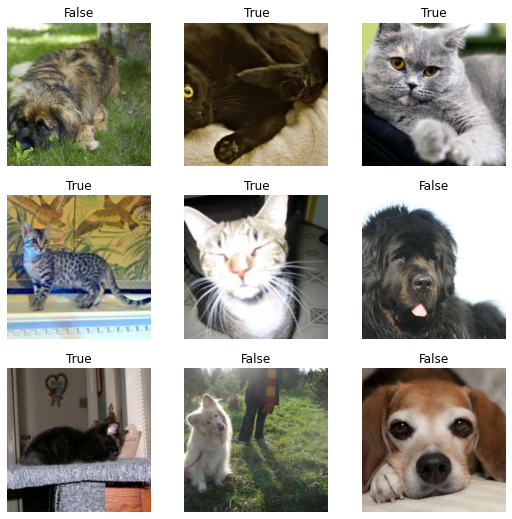

In [20]:
dls.train.show_batch()

In [35]:
len(dls.train), len(dls.valid)

(92, 24)

In [28]:
images, labels = dls.train.one_batch()
print(images.shape)
print(labels.shape)
print(labels)

torch.Size([64, 3, 224, 224])
torch.Size([64])
TensorCategory([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], device='cuda:0')


In [37]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.131211,0.014129,0.996617,00:28


epoch,train_loss,valid_loss,accuracy,time
0,0.044338,0.012154,0.996617,00:34


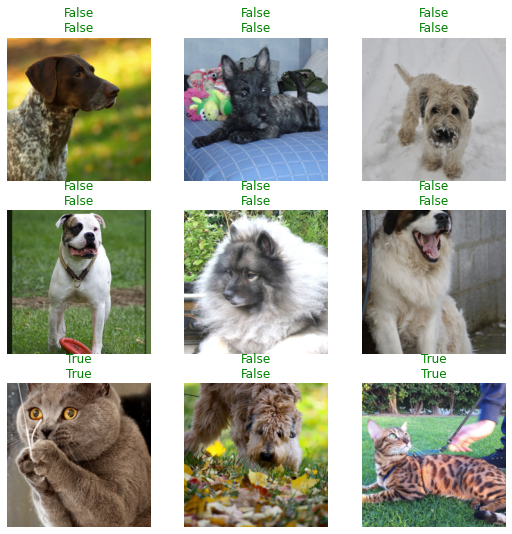

In [45]:
learn.show_results()

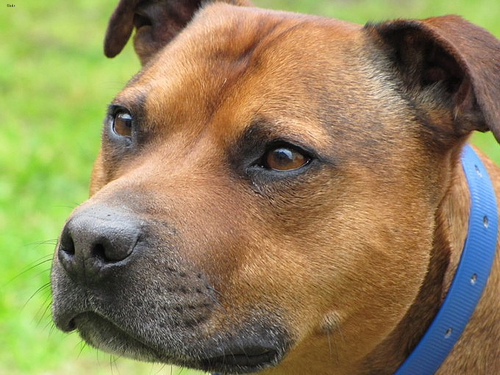

In [47]:
img = PILImage.create(files[0])
img

In [48]:
learn.predict(img)

('False', tensor(0), tensor([9.9999e-01, 5.4552e-06]))